1.	Build a Deep Feed Forward ANN by implementing the Backpropagation algorithm and test the same using appropriate data sets. Use the number of hidden layers >=4.


Training model with relu activation...


c:\Users\deepd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7264 - loss: 0.6309 - val_accuracy: 0.9050 - val_loss: 0.3409
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8932 - loss: 0.2970 - val_accuracy: 0.9250 - val_loss: 0.1920
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9192 - loss: 0.1814 - val_accuracy: 0.9450 - val_loss: 0.1356
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9320 - loss: 0.1637 - val_accuracy: 0.9700 - val_loss: 0.1056
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9500 - loss: 0.1052 - val_accuracy: 0.9700 - val_loss: 0.0939
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9600 - loss: 0.0881 - val_accuracy: 0.9700 - val_loss: 0.0784
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9779 - loss: 0.0677 - val_accuracy: 0.9850 - val_loss: 0.0712
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9808 - loss: 0.0586 - val_accuracy: 0.9750 - val_loss

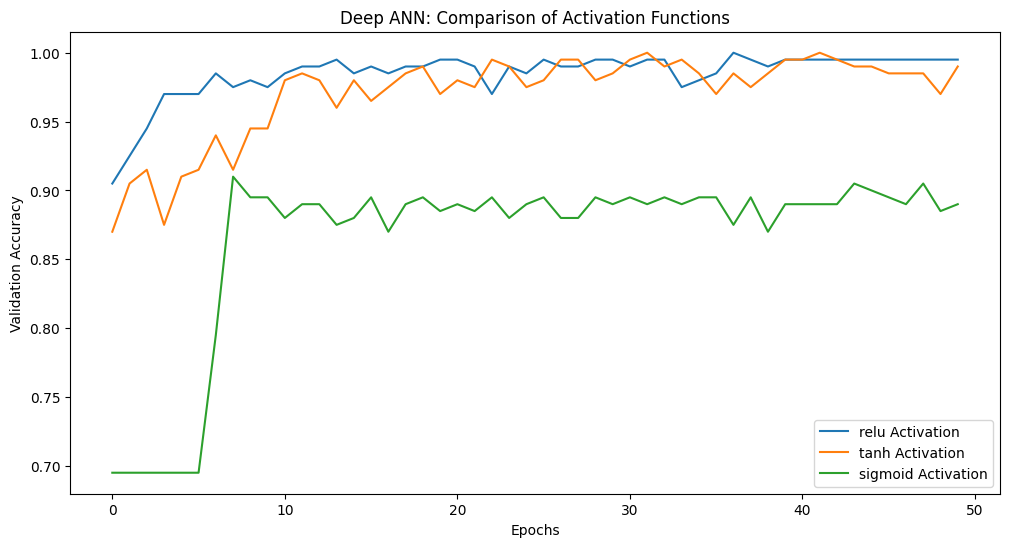

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset (customer purchase prediction)
num_samples = 1000
age = np.random.randint(18, 65, num_samples)  
income = np.random.randint(20000, 120000, num_samples)  
website_activity = np.random.uniform(0, 1, num_samples) * 100  
email_engagement = np.random.uniform(0, 1, num_samples) * 100  

# Generate target labels (Purchased = 1, Not Purchased = 0)
purchase = (income > 50000) & (website_activity > 40) & (email_engagement > 30)
purchase = purchase.astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Website_Activity_Score': website_activity.round(2),
    'Email_Engagement_Score': email_engagement.round(2),
    'Purchased': purchase
})

# Save dataset to CSV file
df.to_csv("customer_purchase_data.csv", index=False)

# Load dataset
df = pd.read_csv("customer_purchase_data.csv")

# Separate features (X) and target variable (y)
X = df.drop(columns=['Purchased']).values  
y = df['Purchased'].values  

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to build and train a Deep ANN model
def build_and_train_ann(activation_function):
    # Define a deep feedforward neural network
    model = Sequential([
        Dense(64, activation=activation_function, input_shape=(X_train.shape[1],)),  # Input layer
        Dense(128, activation=activation_function),  # Hidden layer 1
        Dense(64, activation=activation_function),  # Hidden layer 2
        Dense(32, activation=activation_function),  # Hidden layer 3
        Dense(16, activation=activation_function),  # Hidden layer 4
        Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])

    # Compile the model using Backpropagation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate model performance
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Activation: {activation_function} | Test Accuracy: {accuracy:.4f}")

    return history

# Define activation functions for comparison
activations = ['relu', 'tanh', 'sigmoid']
histories = {}

plt.figure(figsize=(12, 6))

# Train and compare different activation functions
for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    histories[activation] = build_and_train_ann(activation)

    # Plot accuracy over epochs
    plt.plot(histories[activation].history['val_accuracy'], label=f"{activation} Activation")

# Graph labels
plt.title('Deep ANN: Comparison of Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
